# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [164]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np
import itertools

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [165]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [166]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """

        return np.square(X @ w - y).mean()

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        
        grad0 = X.T @ (X @ w - y)
        return 2 * grad0 / y.shape[0]

Вроде в случае матриц (2D) можно вместо np.dot использовать перегруженный оператор `@`, поэтому так и делал

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [167]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [168]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    def update_weight(w_prev: np.ndarray, _) -> np.ndarray:
        return w_prev - lr * loss.calc_grad(X, y, w_prev)

    return list(itertools.accumulate([0] * (n_iterations - 1), 
                                     func=update_weight, 
                                     initial=w_init))


Сначала тут было решение как ниже: 
```python
    weights = [w_init] * n_iterations

    for i in range(1, n_iterations):
        weights[i] = weights[i - 1] - lr * loss.calc_grad(X, y, weights[i - 1])

    return weights
```
Потом меня осенило и я вспомнил про существование `itertools`. Счастливый пошел проверять насколько это быстрее обычных циклов, но это каким-то образом оказалось настолько же медленно, чхз?? Видимо результат виден на гораздо больших числах итераций, ну или itertools это просто синтаксический сахар. Если так, то я разочарован в питоне((
    
Ну зато заработал ачивку сделать без `for`

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [169]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [170]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)

print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649652


In [171]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

Просмотрев задания ниже, заметил, что там активно используются `w_init, X, y, loss` в разных функциях. Поэтому создам массивчик чтобы подставлять их быстрее.

Наверное, было бы быстрее писать их везде вручную, а не писать это никому не нужное пояснение, ну да ладно

In [172]:
params = [w_init, X, y, loss]

lr = 0.0005


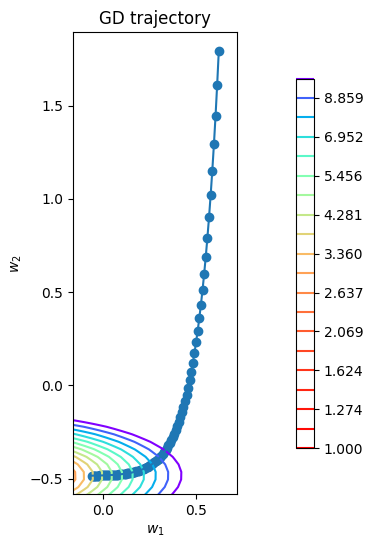

lr = 0.001


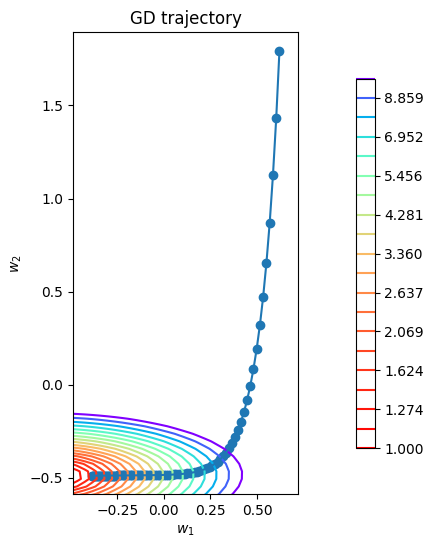

lr = 0.005


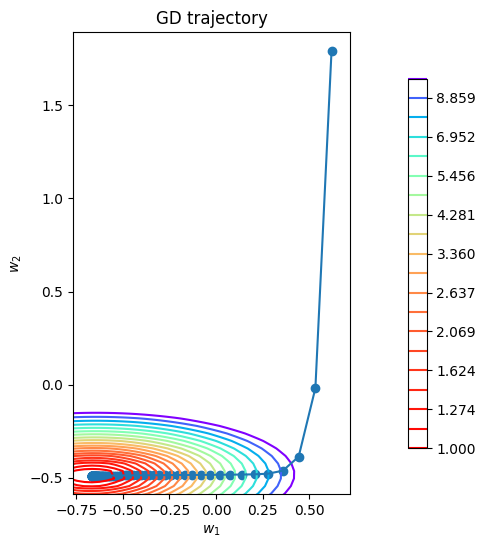

lr = 0.01


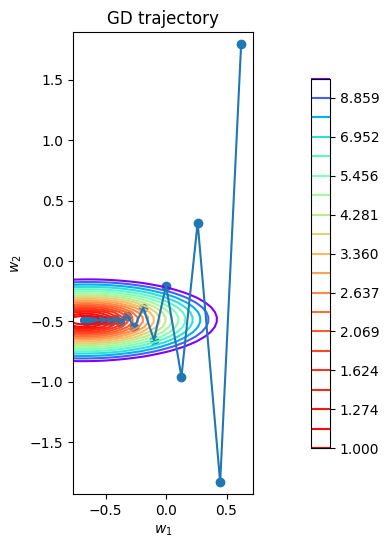

In [173]:
# -- YOUR CODE HERE --
for lr in [0.0005, 0.001, 0.005, 0.01]:
    w_list = gradient_descent(*params, lr, n_iterations=100)
    print(f'lr = {lr}')
    plot_gd(w_list, *params[1:])

Выводить графики по одному это прям бубубу. Очень хочется как-то сделать сетку через `plt.subplots`, но очень нет на это времени :(

При длине шага в 0.0001 и 0.1 графики получаются слишком сплющенные (обманули, получается :( ), поэтому смотрел на траекторию спуска для значений посередине между ними

Из графиков видно, что чем меньше длина шага, тем чаще мы останавливаемся и считаем градиент $\Rightarrow$ тем более пологим получается спуск. 

Чем больше длина шага, тем менее плавным получается спуск (при большом lr один из весов начинает колебаться относительно правильного, но это не оч хорошо, лучше когда спуск плавнее).

Стоит также отметить, что при разных шагах, $w_2 \simeq -0.5$, но $w_1$ отличается (чем больше шаг, тем больше по модулю $w_1$ и тем ближе он к локальному минимуму в центре цветных изолиний). Это связано с тем, что число итераций одинаково для всех спусков ($n = 100$), и при маленькой длине шага мы просто не успеваем дойти до локального минимума из стартовой точки. Использовал это значение только чтобы наглядно показать влияние `lr` на эффект, описанный выше. Поэтому далее буду использовать дефолтное значение в 1000 итераций

Можно сделать вывод, что длину шага стоит тщательно подбирать, чтобы
* гарантированно попасть в локальный минимум (ну или хотя бы ближайшую окрестность)
* сделать как можно меньше вычислений, т.е. соблюсти баланс между точностью и скоростью вычислений
---

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [174]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    def update_weight(w_prev: np.ndarray, _) -> np.ndarray:
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch_X = X[batch_indices]
        batch_y = y[batch_indices]

        return w_prev - lr * loss.calc_grad(batch_X, batch_y, w_prev)
    

    return list(itertools.accumulate([w_init] * (n_iterations - 1), 
                                     func=update_weight, 
                                     initial=w_init))

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

lr = 0.005, bs = 10


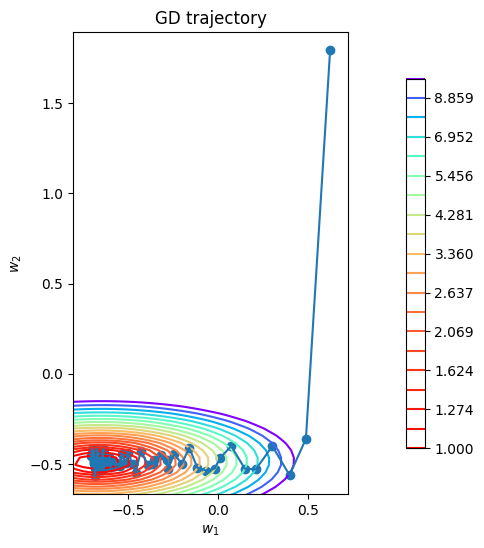

lr = 0.005, bs = 100


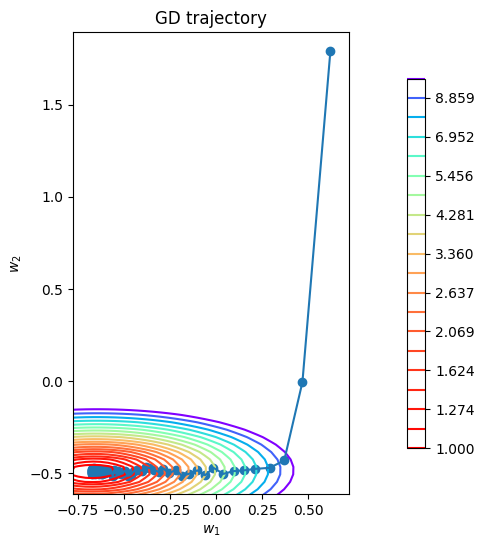

lr = 0.01, bs = 10


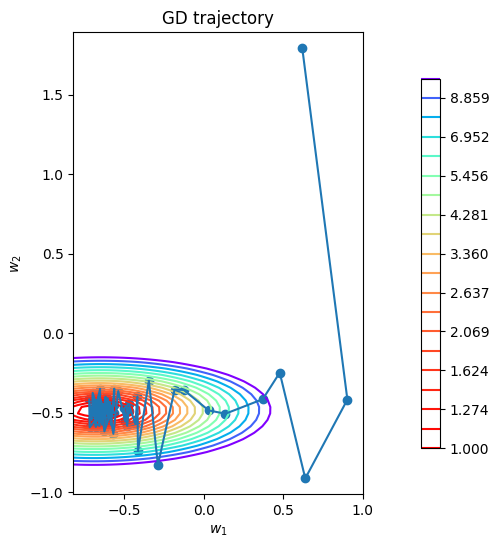

lr = 0.01, bs = 100


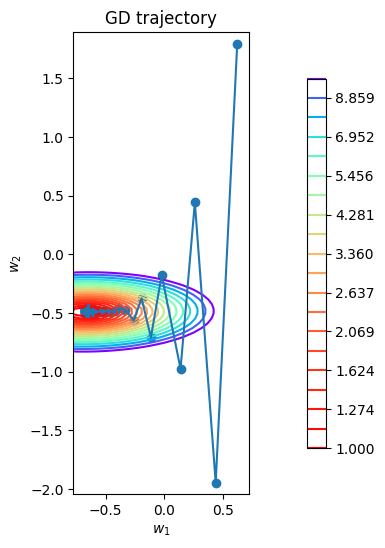

In [175]:
np.random.seed(481516234)

lrs = [0.005, 0.01]
bss = [10, 100]
for lr, bs in itertools.product(lrs, bss):
    print(f'lr = {lr}, bs = {bs}')
    w_list = stochastic_gradient_descent(*params, lr=lr, batch_size=bs, n_iterations=100)
    plot_gd(w_list, *params[1:])

Подобрать параметры чтобы наглядно показать все случаи как-то хардово, но общую тенденцию можно увидеть.

При большом `batch_size`, графики стохастического ГС очень похожи на аналогичные (по длине шага) при обычном ГС. Здесь длина шага роляет абсолютно также, как и при обычном ГС (как - писал выше)

При маленьком `batch_size` графикам прям ну совсем не оч. Спуск становится более корявым, и веса начинают не просто колебаться, но прыгать. Особенно это заметно при большом шаге. Мы довольно быстро попадаем в окрестность минимума, но ровно попасть не можем очень долго. Это связано с тем что при маленьком `batch_size` ошибка становится более рандомной, а ставя большой шаг мы усиливаем эффект этого рандома (так как в формуле стоит произведение шага и ошибки).

Overall, все графики стохастического ГС - неплавные и с резкими скачками. Это связано с его главной фичей считать ошибку только на части выборки $\Rightarrow$ на одной части эта ошибка может быть высокая, на другой низкая, от этого и берутся скачки. Но для оптимальных параметров мы все также добиваемся главной цели - попадания в локальный минимум. Даже поставив небольшое число итераций мы во всех случаях в него попали.

Оптимальная пара `lr` и `batch_size` такова: шаг берется такой же, как и при обычном ГС. `batch_size`, имхо, можно взять где-то 0.2-0.3 от размера выборки, этого будет более чем достаточно и точность получится довольно неплохая

---

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [176]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    s0 = 1

    weights = [w_init] * n_iterations

    for i in range(1, n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch_X = X[batch_indices]
        batch_y = y[batch_indices]
        step = lr * (s0 / (s0 + i)) ** p

        weights[i] = weights[i - 1] - step * loss.calc_grad(batch_X, batch_y, weights[i - 1])

    return weights

Тут без цикла никак, потому что надо знать номер итерации :((

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p = 0.1


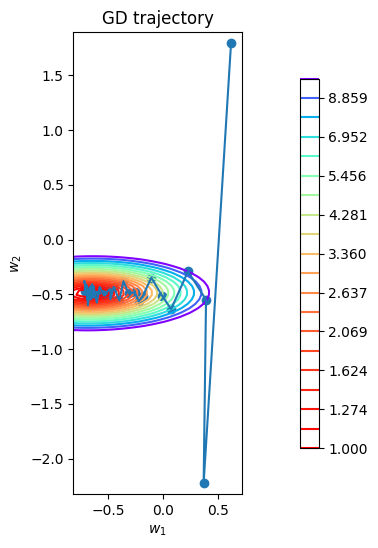

p = 0.3


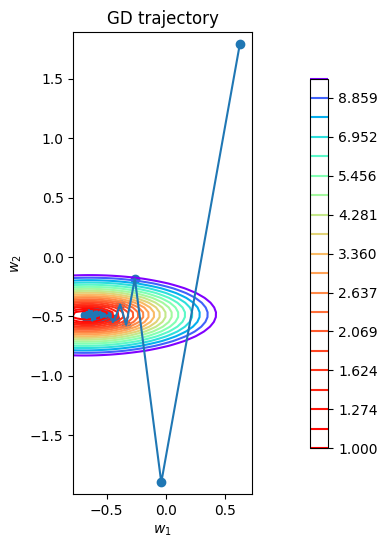

p = 0.5


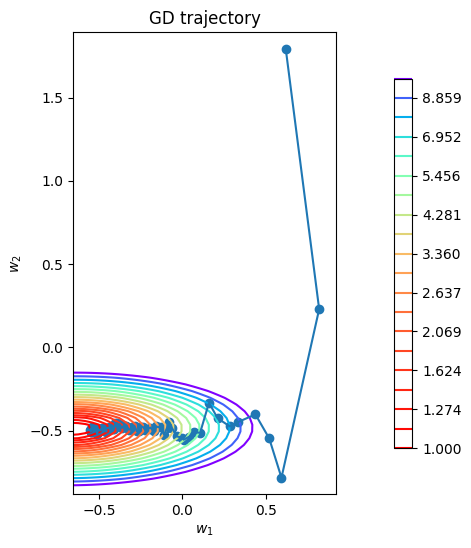

p = 0.7


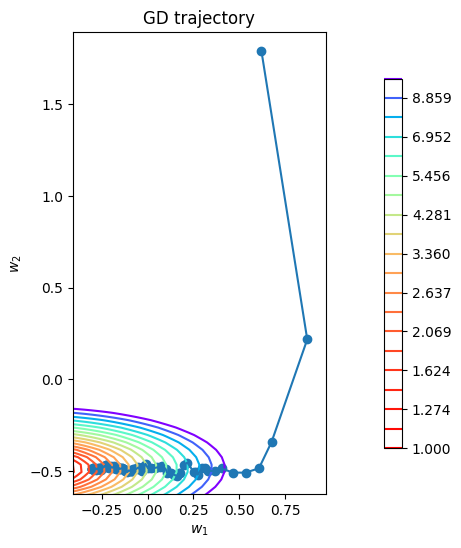

In [177]:
np.random.seed(481516234)

for p in [0.1, 0.3, 0.5, 0.7]:
    print(f'p = {p}')
    w_list = stochastic_gradient_descent(*params, p=p, lr=0.01, batch_size=10, n_iterations=100)
    plot_gd(w_list, *params[1:])

Специально выставил число итераций 100, чтобы наглядно был виден эффект маленького шага - неуспевание попадания в локальный минимум

Как можно понять из формулы, параметр `p` влияет на то насколько сильно уменьшается длина шага с каждой итерацией. Чем ближе `p` к 0 (отрицательные `p` просто не имеют смысла), тем меньше шаг меняется с каждой итерацией. И, наоборот, чем больше p, тем быстрее шаг уменьшается.

При больших `p` мы не успели попасть в минимум, значит шаг уменьшался слишком быстро. Оптимальным параметром `p` я думаю является значение около 0.2-0.3. При нем соблюдается баланс точности и скорости, о котором я писал ранее

---

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [178]:
# -- YOUR CODE HERE --
lr = 0.0001
n_iterations = 1000

loss_func = lambda w: loss.calc_loss(X, y, w)

weights_gd = gradient_descent(*params, lr, n_iterations=n_iterations)
weights_sgd = stochastic_gradient_descent(*params, lr, batch_size=10, p=0.2, n_iterations=n_iterations)

losses_gd = np.apply_along_axis(loss_func, 1, weights_gd)
losses_sgd = np.apply_along_axis(loss_func, 1, weights_sgd)

iterations = np.arange(n_iterations)

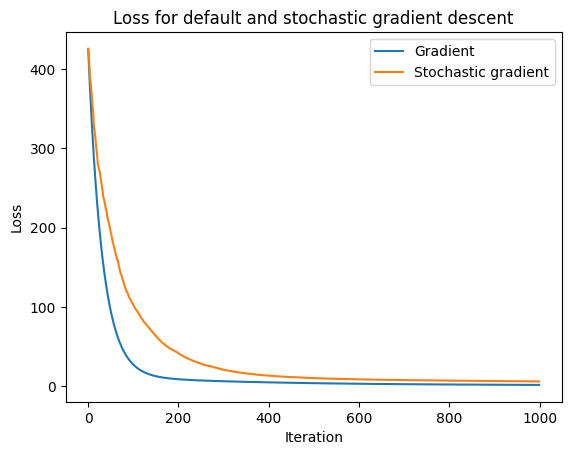

In [179]:
plt.title('Loss for default and stochastic gradient descent')

plt.plot(iterations, losses_gd, label='Gradient')
plt.plot(iterations, losses_sgd, label='Stochastic gradient')

plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.legend()
plt.show()

По графикам видно, что ошибка при обычном ГС всегда меньше, чем при стохастическом. То есть если мы зафиксируем некий порог ошибки как незначительный, то при обычном ГС мы попадем в него раньше.

Однако на большом числе итераций графики довольно быстро выравниваются, при этом MSE в двух методах одинаково маленькие. То есть, хоть ошибка и становится маленькой при обычном ГС гораздо быстрее, при больших номерах итераций она становится маленькой также и при стохастическом ГС. Если подобрать хорошие параметры числа итераций, а также параметров стохастического ГС, его нам будет более чем достаточно

Основное преимущество стохастического ГС - скорость работы. В данном примере хоть и задаем большое число итераций, ошибку при каждом шаге считаем только для 10 объектов, то есть всего для 3% (!) выборки. Это значительно снижает вычислительную сложность (в $\frac{l}{batch\_size}$ раз) и ускоряет работу программы. На графике этого понятное дело не видно, т.к. оси времени нет

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [180]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        self.w = np.random.uniform(-2, 2, (X.shape[1], ))
        self.w = gradient_descent(self.w, X, y, self.loss, self.lr)[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        return X @ self.w

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [181]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [182]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [183]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [184]:
print(X_raw.shape)
X_raw.head()

(201, 26)


,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

Сначала дропнем бесполезную колонку `index`. Затем посмотрим на число пропусков в тех колонках, где оно ненулевое

In [185]:
X_raw = X_raw.drop('index', axis=1)

na = X_raw.shape[0] - X_raw.count()
na[na > 0]

1     37
5      2
18     4
19     4
21     2
22     2
dtype: int64

Видим, что пропуски есть в колонках 1, 5, 18, 19, 21, 22. Посмотрим что в них хранится

In [186]:
na_cols = na[na > 0].index
print(X_raw[na_cols].dtypes, '\n')
print(X_raw[na_cols].nunique())

1     float64
5      object
18    float64
19    float64
21    float64
22    float64
dtype: object 

1     51
5      2
18    38
19    36
21    58
22    22
dtype: int64


Понятно, что в колонке 5 - бинарный категориальный признак $\Rightarrow$ кодируем пропуски (которых всего 2, что супер мало) наиболее частым признаком

Остальные же колонки - числовые признаки. Закодировать можно средним. Для этого восользуемся `SimpleImputer` из sklearn

In [187]:
from sklearn.impute import SimpleImputer

X_raw[5].fillna(X_raw[5].value_counts().idxmax(), inplace=True)

missing = X_raw.columns[X_raw.isna().any()]

imp = SimpleImputer(strategy='mean')
X_missing = X_raw[missing]
X_filled = pd.DataFrame(data=imp.fit_transform(X_missing),
                        columns=X_missing.columns)

X_raw[missing] = X_filled
print(X_raw.isnull().any().any())
X_raw.head()

False


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


Пропусков теперь нет. Можем двигаться к нормализации и кодированию

Нормализацию буду делать с помощью `StandardScaler`, а кодирование - обыкновенное OneHot. При кодировании указывать `sparse=True` будет лишним, так как написан свой регрессор, который не умеет эффективно работать с разреженными матрицами

In [188]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

categ = (X_raw.dtypes == "object").values

X_num = X_raw[X_raw.columns[~categ]]
X_cat = X_raw[X_raw.columns[categ]]

X_num = pd.DataFrame(data=scaler.fit_transform(X_num),
                         columns=X_num.columns)

X_cat = pd.get_dummies(X_cat)

X = pd.concat([X_num, X_cat], axis=1)
X.head()

,0,1,9,10,11,12,13,16,18,19,...,15_twelve,15_two,17_1bbl,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.520894,-1.829927,...,0,0,0,0,0,0,0,1,0,0
1,1.725050,0.000000,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.075389,0.520894,-1.829927,...,0,0,0,0,0,0,0,1,0,0
2,0.127193,0.000000,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,0.606234,-2.433435,0.675938,...,0,0,0,0,0,0,0,1,0,0
3,0.926121,1.315931,0.165748,0.195176,0.148335,0.218425,-0.423766,-0.431327,-0.526210,0.453899,...,0,0,0,0,0,0,0,1,0,0
4,0.926121,1.315931,0.099646,0.195176,0.243744,0.218425,0.520017,0.220165,-0.526210,0.453899,...,0,0,0,0,0,0,0,1,0,0


Теперь разделим данные на тренировочную и тестовую выборку

In [189]:
from sklearn.model_selection import train_test_split

np.random.seed(481516234)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

Теперь данные готовы к работе

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [190]:
linear_regression.fit(X_train, y_train);

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [191]:
from sklearn.metrics import mean_squared_error

print('Train MSE =', mean_squared_error(linear_regression.predict(X_train), y_train))
print('Test MSE =', mean_squared_error(linear_regression.predict(X_test), y_test))

Train MSE = 1974767.4274052768
Test MSE = 4153119.6614376847


Ошибка на тренировочной выборке в 2 раза больше ошибки на тестовой (на других сидах сильно больше, раз в 5, но я уже взял за традицию юзать этот сид), следовательно модель переобучилась (догадался сам, честно честно)

Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [192]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        loss = np.square(X @ w - y).mean()
        reg = self.coef * np.sum(np.square(w[:-1]))

        return loss + reg       

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        grad0 = X.T @ (X @ w - y)
        grad_loss =  2 * grad0 / y.shape[0]
        
        grad_reg = 2 * self.coef * w
        grad_reg[-1] = 0

        return grad_loss + grad_reg

Так как в питоне аргументы передаются по ссылке, то в реализации `calc_grad` нельзя было бы занулить последний вес явно как `w[0] = 0`, иначе он бы поменялся и в исходном векторе весов

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [193]:
linear_regression = LinearRegression(MSEL2Loss(0.01))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

Для удобства создам функцию, которая по заданной функции потерь и значениям гиперпараметра будет считать и выводить ошибку в красивом виде

In [194]:
def show_errors_for_loss(loss: BaseLoss, params: Iterable):
    lrs = []

    for p in params:
        lr = LinearRegression(loss(p))
        lr.fit(X_train, y_train)
        lrs.append(lr)

    train, test = [], []

    for lr in lrs:
        train.append(int(mean_squared_error(lr.predict(X_train), y_train)))
        test.append(int(mean_squared_error(lr.predict(X_test), y_test)))

    display(pd.DataFrame({'Train MSE': train, 'Test MSE': test}, index=params))

Сначала определим порядок оптимального значения коэффицента регуляризации

In [195]:
show_errors_for_loss(MSEL2Loss, [0.001, 0.01, 0.1, 1])

,Train MSE,Test MSE
0.001,2058017,3522617
0.010,2821637,4092390
0.100,5667781,6479756
1.000,12645746,8070266


Оптимальный вариант - несколько тысячных. Чтобы найти поточнее повторим поиск для значений такого же порядка

In [196]:
lambdas = np.arange(2e-3, 0.01, 2e-3)
show_errors_for_loss(MSEL2Loss, lambdas)

,Train MSE,Test MSE
0.002,2160747,3446503
0.004,2353476,3550940
0.006,2525628,3729927
0.008,2680546,3915779


Оптимальный вариант $\lambda \simeq 0.002$. При таком варианте хоть ошибка на тренировочной выборке повысилась, на тестовой сильно снизилась. Таким образом хоть немного но перебороли переобучение 

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [197]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = X @ w - y
        mask = (-self.eps < z) & (z < self.eps)

        losses = np.zeros((X.shape[0],))

        losses[mask] = 0.5 * np.square(z[mask])
        losses[~mask] = self.eps * (np.abs(z[~mask]) - 0.5 * self.eps)

        return losses.mean()

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        z = X @ w - y
        mask = (-self.eps < z) & (z < self.eps)

        grad_losses = np.zeros((X.shape[0], ))

        grad_losses[mask] = z[mask]
        grad_losses[~mask] = self.eps * (np.sign(z[~mask]))

        return (grad_losses.T @ X) / X.shape[0]

Подглядев в семинары нашел очень классный подход с масками. Они делают код интуитивно понятнее, надо бы юзать их почаще. В данной реализации маска - принадлежность числа $z$ интервалу $ - \varepsilon < z < \varepsilon$

Также может быть неочевиден момент зачем транспонируем `grad_losses`. На выходе должны получить градиент, то есть вектор размером числа фич. Тогда нужно для каждого объекта выборки умножить его на соответствующую частную производную из `grad_losses`. Чтобы это сделать и нужно транспонировать вектор и превратить его в столбец 

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

По аналогии с L2 сначала определим порядок $\varepsilon$, затем более точное значение

In [198]:
eps = [1, 10, 100, 1000, 10000]
show_errors_for_loss(HuberLoss, eps)

,Train MSE,Test MSE
1,15292644,6975211
10,4819255,7070004
100,2864160,3622684
1000,2344106,3400542
10000,1974771,4149618


Порядок оптимального пока не понятен, поэтому посмотрим на 2 сразу

In [199]:
eps = range(2000, 10000, 2000)
show_errors_for_loss(HuberLoss, eps)

,Train MSE,Test MSE
2000,2160955,3351516
4000,2024964,3923218
6000,1979992,4065377
8000,1974771,4149264


In [200]:
eps = range(200, 1000, 200)
show_errors_for_loss(HuberLoss, eps)

,Train MSE,Test MSE
200,2661676,4149006
400,2495560,4176628
600,2430240,3884511
800,2388388,3619361


Очень долго подбирав гиперпараметр $\varepsilon$, оптимальный получил в районе 2000. Ошибка здесь получилась совсем немного меньше, чем при использовании `MSEL2Loss`. Если же сравнивать c `MSELoss`, то результат все такой же наглядный - частично побороли переобучение, ошибка стала ниже

Наверное, HuberLoss можно использовать как функцию потерь, ее задумка понятна и звучит как довольно прикольная и логически обоснованная. Но сложность с HuberLoss заключается в подборе гиперпараметра. При L2 регуляризации делать это имхо проще, но может я просто не умею рандомить

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

Так, ну если честно то это самое сложное задание в домашке. Вроде где-то в 2021 (а может и раньше, уже не помню) начали появляться мои любимые пикчи с превью с игроками из кс го. Самая базированная конечно это "бро, тебе надо тренироваться", но вот мои любимые (за маты соре). Кстати, довольно неплохо подходят под это дз

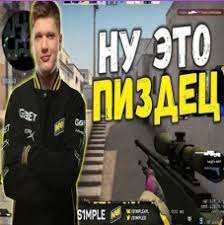

![](https://chpic.su/_data/stickers/c/cybersport_nn/cybersport_nn_034.webp)

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [201]:
# -- YOUR CODE HERE --